In [1]:
import pandas as pd
import numpy as np
# KNN 패키지
from sklearn.neighbors import KNeighborsClassifier
#데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#데이터 불러오기
ds_hmeq = pd.read_csv("../../실습화일/통신고객이탈.csv")
ds_hmeq["CHURN"].replace(to_replace="Active", value=0, inplace = True)
ds_hmeq["CHURN"].replace(to_replace="Churned", value=1, inplace = True)
ds_hmeq = ds_hmeq.drop("CUSTOMER_ID", axis = 1, inplace = False)
ds_hmeq.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
#get_dummies : 데이터의 문자형 컬럼에 대한 더미변수 생성
ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
#더미변수 생성된 데이터의 상위 5개 row를 확인
ds_hmeq_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
#dummy 변수로부터 변수 역할 지정
ds_hmeq_y = ds_hmeq_dummy["CHURN"]
ds_hmeq_x = ds_hmeq_dummy.drop("CHURN", axis = 1, inplace = False)
#train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터비율, random_state : 랜덤)
ds_hmeq_train_x, ds_hmeq_test_x, ds_hmeq_train_y, ds_hmeq_test_y =\
train_test_split(ds_hmeq_x, ds_hmeq_y, test_size = 0.30, random_state = 1234)

print("train data X size : {}".format(ds_hmeq_train_x.shape))
print("train data Y size : {}".format(ds_hmeq_train_y.shape))
print("test data X size : {}".format(ds_hmeq_test_x.shape))
print("test data Y size : {}".format(ds_hmeq_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


In [5]:
#KNN모델 생성(default 설정)
knn_uncusotomized = KNeighborsClassifier(n_jobs = 8)
knn_uncusotomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=8, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
#데이터 적합
knn_uncusotomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)
#test 데이터로 예측
y_pred = knn_uncusotomized.predict(ds_hmeq_test_x)
print("predict test set:{}".format(y_pred.tolist()[:10]))
print("test set label:{}".format(ds_hmeq_test_y.tolist()[:10]))
print("accuracy:{0:.3f}".format(knn_uncusotomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))


predict test set:[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
test set label:[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
accuracy:0.803


In [7]:
#최대 이웃 수
max_n_neighbors = 10  # 반복 수행할 리스트(1~10)
para_n_neighbors = [i+1 for i in range(max_n_neighbors)]
train_accuracy = []
test_accuracy = []
#반복문
for n_neighbors in para_n_neighbors:
    #이웃 1~10개까지 지정하여 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    #train data 정확도
    train_accuracy.append(clf.score(ds_hmeq_train_x, ds_hmeq_train_y))
    #test data 정확도
    test_accuracy.append(clf.score(ds_hmeq_test_x, ds_hmeq_test_y))
#DataFrame 변환
ds_neighbors = pd.DataFrame()
ds_neighbors["Neighbors"] = para_n_neighbors
ds_neighbors["TrainAccuracy"] = train_accuracy
ds_neighbors["TestAccuracy"] = test_accuracy
ds_neighbors

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000000,0.716846
1,2,0.850998,0.820789
2,3,0.843318,0.792115
3,4,0.824885,0.820789
4,5,0.820276,0.802867
5,6,0.821813,0.838710
6,7,0.818740,0.827957
7,8,0.806452,0.835125
8,9,0.809524,0.831541
9,10,0.804916,0.838710


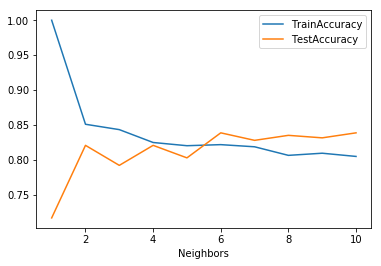

In [8]:
#그래프 생성
ds_neighbors.set_index("Neighbors", inplace = False).plot()

In [9]:
max_n_neighbors = 10
para_n_neighbors = [i+1 for i in range(max_n_neighbors)] *2 
#가중치(uniform, distance)
para_weights = ["uniform"] * max_n_neighbors + ["distance"] * max_n_neighbors
train_accuracy = []
test_accuracy = []
# zip(list1, list2, ...) 를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]
for (n_neighbors, weights) in zip(para_n_neighbors, para_weights):
    #이웃 1~10개까지 지정하여 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights)
    clf.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    #train data 정확도
    train_accuracy.append(clf.score(ds_hmeq_train_x, ds_hmeq_train_y))
    #test data 정확도
    test_accuracy.append(clf.score(ds_hmeq_test_x, ds_hmeq_test_y))
#DataFrame 변환
ds_neighbors_weight = pd.DataFrame()
ds_neighbors_weight["Neighbors"] = para_n_neighbors
ds_neighbors_weight["Weights"] = para_weights
ds_neighbors_weight["TrainAccuracy"] = train_accuracy
ds_neighbors_weight["TestAccuracy"] = test_accuracy
ds_neighbors_weight

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000000,0.716846
1,2,uniform,0.850998,0.820789
2,3,uniform,0.843318,0.792115
3,4,uniform,0.824885,0.820789
4,5,uniform,0.820276,0.802867
5,6,uniform,0.821813,0.838710
6,7,uniform,0.818740,0.827957
7,8,uniform,0.806452,0.835125
8,9,uniform,0.809524,0.831541
9,10,uniform,0.804916,0.838710


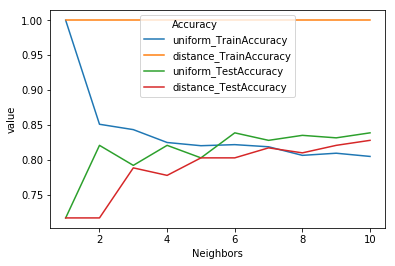

In [10]:
#melt method: 데이터를 재구성하는 함수로 id_vars를 기준으로 transpose
ds_neighbors_weight_melt = pd.melt(ds_neighbors_weight, id_vars = ["Neighbors", "Weights"])
#variable 열에는 ds_neighbors_weight데이터의 id_vars를 제외한 column 명이 있음
#Weights 값들과 concat하여 새로운 범주 변수명 생성
ds_neighbors_weight_melt["Accuracy"] = ds_neighbors_weight_melt["Weights"] + "_" + ds_neighbors_weight_melt["variable"]
#x: x축, y:y축 , hue: 범주
ax = sns.lineplot(x="Neighbors", y = "value", hue = "Accuracy", data = ds_neighbors_weight_melt)

In [11]:
max_n_neighbors = 10
para_n_neighbors = [i+1 for i in range(max_n_neighbors)] *3
# 알고리즘(ball_tree, kd_tree, brute)
para_algorithm = ["ball_tree"] * max_n_neighbors + ["kd_tree"] * max_n_neighbors + ["brute"] * max_n_neighbors
train_accuracy = []
test_accuracy = []
# zip(list1, list2, ...) 를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]
for (n_neighbors, algorithm) in zip(para_n_neighbors, para_algorithm):
    #이웃 1~10개까지 지정하여 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights = "uniform", algorithm = algorithm)
    clf.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    #train data 정확도
    train_accuracy.append(clf.score(ds_hmeq_train_x, ds_hmeq_train_y))
    #test data 정확도
    test_accuracy.append(clf.score(ds_hmeq_test_x, ds_hmeq_test_y))
#DataFrame 변환
ds_neighbors_algorithm = pd.DataFrame()
ds_neighbors_algorithm["Neighbors"] = para_n_neighbors
ds_neighbors_algorithm["Algorithm"] = para_algorithm
ds_neighbors_algorithm["TrainAccuracy"] = train_accuracy
ds_neighbors_algorithm["TestAccuracy"] = test_accuracy
ds_neighbors_algorithm

,Neighbors,Algorithm,TrainAccuracy,TestAccuracy
0,1,ball_tree,1.000000,0.716846
1,2,ball_tree,0.850998,0.820789
2,3,ball_tree,0.843318,0.792115
3,4,ball_tree,0.824885,0.820789
4,5,ball_tree,0.820276,0.802867
5,6,ball_tree,0.821813,0.838710
6,7,ball_tree,0.818740,0.827957
7,8,ball_tree,0.806452,0.835125
8,9,ball_tree,0.809524,0.831541
9,10,ball_tree,0.804916,0.838710


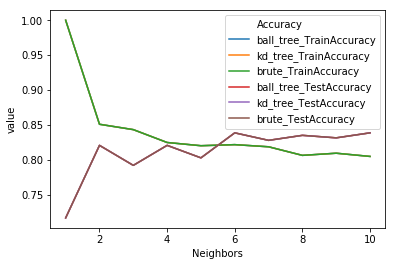

In [12]:
#melt method: 데이터를 재구성하는 함수로 id_vars를 기준으로 transpose
ds_neighbors_algorithm_melt = pd.melt(ds_neighbors_algorithm, id_vars = ["Neighbors", "Algorithm"])
#variable 열에는 ds_neighbors_weight데이터의 id_vars를 제외한 column 명이 있음
#Algorithm 값들과 concat하여 새로운 범주 변수명 생성
ds_neighbors_algorithm_melt["Accuracy"] = ds_neighbors_algorithm_melt["Algorithm"] + "_" + ds_neighbors_algorithm_melt["variable"]
#x: x축, y:y축 , hue: 범주
ax = sns.lineplot(x="Neighbors", y = "value", hue = "Accuracy", data = ds_neighbors_algorithm_melt)

In [13]:
max_n_neighbors = 10
para_n_neighbors = [i+1 for i in range(max_n_neighbors)] *3
# 거리 계산 방법(minkowski, euclidean, manhattan)
para_metric = ["minkowski"] * max_n_neighbors + ["euclidean"] * max_n_neighbors + ["manhattan"] * max_n_neighbors
train_accuracy = []
test_accuracy = []
# zip(list1, list2, ...) 를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]
for (n_neighbors, metric) in zip(para_n_neighbors, para_metric):
    #이웃 1~10개까지 지정하여 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights = "uniform", algorithm = "ball_tree", metric = metric)
    clf.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    #train data 정확도
    train_accuracy.append(clf.score(ds_hmeq_train_x, ds_hmeq_train_y))
    #test data 정확도
    test_accuracy.append(clf.score(ds_hmeq_test_x, ds_hmeq_test_y))
#DataFrame 변환
ds_neighbors_metric = pd.DataFrame()
ds_neighbors_metric["Neighbors"] = para_n_neighbors
ds_neighbors_metric["Metric"] = para_metric
ds_neighbors_metric["TrainAccuracy"] = train_accuracy
ds_neighbors_metric["TestAccuracy"] = test_accuracy
ds_neighbors_metric

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000000,0.716846
1,2,minkowski,0.850998,0.820789
2,3,minkowski,0.843318,0.792115
3,4,minkowski,0.824885,0.820789
4,5,minkowski,0.820276,0.802867
5,6,minkowski,0.821813,0.838710
6,7,minkowski,0.818740,0.827957
7,8,minkowski,0.806452,0.835125
8,9,minkowski,0.809524,0.831541
9,10,minkowski,0.804916,0.838710


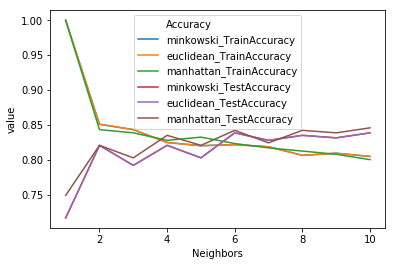

In [14]:
#melt method: 데이터를 재구성하는 함수로 id_vars를 기준으로 transpose
ds_neighbors_metric_melt = pd.melt(ds_neighbors_metric, id_vars = ["Neighbors", "Metric"])
#variable 열에는 ds_neighbors_weight데이터의 id_vars를 제외한 column 명이 있음
#Algorithm 값들과 concat하여 새로운 범주 변수명 생성
ds_neighbors_metric_melt["Accuracy"] = ds_neighbors_metric_melt["Metric"] + "_" + ds_neighbors_metric_melt["variable"]
#x: x축, y:y축 , hue: 범주
ax = sns.lineplot(x="Neighbors", y = "value", hue = "Accuracy", data = ds_neighbors_metric_melt)

In [15]:
clf_model = KNeighborsClassifier(n_neighbors = 4, weights = "uniform", algorithm = "ball_tree", metric = "euclidean")
clf_model.fit(ds_hmeq_train_x, ds_hmeq_train_y)
print("train data accuracy: {0:.3f}".format(clf_model.score(ds_hmeq_train_x, ds_hmeq_train_y)))
print("test data accuracy: {0:.3f}".format(clf_model.score(ds_hmeq_test_x, ds_hmeq_test_y)))


train data accuracy: 0.825
test data accuracy: 0.821
